In [1]:
# TO DO: 
# Convert the network into a bipartite/pseudo-bipartite network, between importers on one side and exporters on the other
# Already doing this we would have done a lot of network analysis and shown off a lot
# Then also include a previous years' network and we can do a comparison between the two

In [170]:
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

import glob

In [188]:
# Point to the 2022 BACI csv dataset
file_path = "/Users/zenrehda/Desktop/NAProject/BACI_HS22_Y2022_V202401b.csv"
file_path_countries = "/Users/zenrehda/Desktop/NAProject/country_codes_V202401b.csv"

In [ ]:
# Point to the 2022 BACI csv dataset for windows
#file_path = "BACI_HS22_Y2022_V202401b.csv"
#file_path_countries = "country_codes_V202401b.csv"

In [189]:
# Our product code for historical artifacts, saved as a list if we want to include multiple product codes
product_codes = [970610]

In [190]:
# Read the CSV in chunks, ensuring the Multi-Index structure is preserved
filtered_data = pd.concat(
    chunk[chunk.index.get_level_values('k').isin(product_codes)] for chunk in pd.read_csv(
        file_path, chunksize=10000, index_col=[0, 1, 2, 3, 4, 5]  # Adjust this list to match your Multi-Index levels
    )
)

In [191]:
# Read the CSV in chunks, ensuring the Multi-Index structure is preserved
filtered_countries = pd.concat(
    chunk for chunk in pd.read_csv(
        file_path_countries, chunksize=10000, index_col=[0, 1, 2, 3]  # Adjust this list to match your Multi-Index levels
    )
)

### The codes for each index:
't' = year

'i' = exporter

'j' = importer

'k' = product

'v' = value

'q' = quantity

In [6]:
# DO NOT RUN YET - Code is created to work on a MultiIndex, so we have 0 columns. If we want columns, reset index below

# We reset the index to make sure the columns work as intended, as pandas currently treats this as a MultiIndex (complicado, no me gusta)
#filtered_data = filtered_data.reset_index()

# This will give us the clearly defined columns
#print(filtered_data.columns)

In [192]:
filtered_data

Empty DataFrame
Columns: []
Index: [(2022, 4, 276, 970610, 1.759,         0.003), (2022, 4, 372, 970610, 36.632,         0.015), (2022, 4, 826, 970610, 33.359,         0.034), (2022, 4, 842, 970610, 3.823,         0.002), (2022, 8, 757, 970610, 2.589,         0.013), (2022, 12, 757, 970610, 14.555,         0.004), (2022, 24, 842, 970610, 367.979,         0.029), (2022, 31, 826, 970610, 24.165,         0.012), (2022, 31, 842, 970610, 214.325,         0.065), (2022, 32, 251, 970610, 3.313,         0.002), (2022, 32, 348, 970610, 0.192,            NA), (2022, 32, 842, 970610, 159.839,        40.315), (2022, 36, 246, 970610, 8.567,         0.002), (2022, 36, 276, 970610, 2.984,         0.002), (2022, 36, 372, 970610, 11.188,         0.004), (2022, 36, 380, 970610, 6.303,         0.014), (2022, 36, 528, 970610, 1.391,         0.022), (2022, 36, 554, 970610, 22.597,            NA), (2022, 36, 757, 970610, 1.732,         0.003), (2022, 36, 826, 970610, 519.759,         0.988), (2022, 36, 842, 970610, 46.462,         0.049), (2022, 40, 32, 970610, 8.951,         0.250), (2022, 40, 36, 970610, 62.233,         0.088), (2022, 40, 56, 970610, 2.92,         0.011), (2022, 40, 100, 970610, 0.398,         0.001), (2022, 40, 124, 970610, 72.395,         0.021), (2022, 40, 156, 970610, 233.325,         0.094), (2022, 40, 191, 970610, 1.885,         0.006), (2022, 40, 196, 970610, 1.237,         0.004), (2022, 40, 203, 970610, 7.702,         0.018), (2022, 40, 208, 970610, 1.531,         0.001), (2022, 40, 233, 970610, 0.31,         0.002), (2022, 40, 246, 970610, 0.2,         0.001), (2022, 40, 251, 970610, 125.54,         0.169), (2022, 40, 276, 970610, 83.202,         0.078), (2022, 40, 300, 970610, 1.869,         0.005), (2022, 40, 344, 970610, 1143.926,         1.112), (2022, 40, 348, 970610, 13.871,         0.026), (2022, 40, 372, 970610, 4.08,         0.011), (2022, 40, 376, 970610, 56.432,         0.002), (2022, 40, 380, 970610, 36.132,         0.045), (2022, 40, 392, 970610, 254.361,         0.031), (2022, 40, 410, 970610, 1.028,         0.004), (2022, 40, 440, 970610, 0.164,         0.001), (2022, 40, 442, 970610, 0.269,         0.001), (2022, 40, 490, 970610, 231.12,         0.066), (2022, 40, 528, 970610, 13.628,         0.022), (2022, 40, 579, 970610, 0.776,         0.009), (2022, 40, 616, 970610, 5.542,         0.020), (2022, 40, 620, 970610, 3.874,         0.011), (2022, 40, 642, 970610, 2.847,         0.011), (2022, 40, 643, 970610, 8.62,         0.006), (2022, 40, 699, 970610, 34.536,         0.095), (2022, 40, 703, 970610, 1.873,         0.008), (2022, 40, 705, 970610, 3.686,         0.004), (2022, 40, 724, 970610, 6.31,         0.018), (2022, 40, 752, 970610, 0.805,         0.003), (2022, 40, 757, 970610, 444.043,         0.719), (2022, 40, 792, 970610, 4.16,         0.001), (2022, 40, 826, 970610, 828.397,         0.351), (2022, 40, 842, 970610, 1571.229,         4.307), (2022, 48, 826, 970610, 3.817,         0.001), (2022, 51, 757, 970610, 31.668,         0.009), (2022, 51, 826, 970610, 362.431,         0.001), (2022, 56, 36, 970610, 146.088,         0.086), (2022, 56, 40, 970610, 3.159,         0.002), (2022, 56, 124, 970610, 39.857,         0.158), (2022, 56, 136, 970610, 1.895,         0.004), (2022, 56, 152, 970610, 0.181,         0.002), (2022, 56, 156, 970610, 1.363,         0.002), (2022, 56, 251, 970610, 506.858,         0.711), (2022, 56, 276, 970610, 129.552,         0.112), (2022, 56, 344, 970610, 105.425,         0.060), (2022, 56, 376, 970610, 48.595,         0.428), (2022, 56, 380, 970610, 80.096,         0.001), (2022, 56, 392, 970610, 49.251,         0.006), (2022, 56, 410, 970610, 11.427,         0.012), (2022, 56, 442, 970610, 0.16,         0.012), (2022, 56, 484, 970610, 2.582,         0.003), (2022, 56, 490, 970610, 3.218,         0.004), (2022, 56, 528, 970610, 3.834,         0.008), (2022, 56, 554, 970610, 1.264,         0.001), (2022, 56, 579, 970610, 1.085,         0.001), (2022, 56, 634, 970610, 24.

In [193]:
filtered_countries

,,,
country_code,country_name,country_iso2,country_iso3
4,Afghanistan,AF,AFG
8,Albania,AL,ALB
12,Algeria,DZ,DZA
16,American Samoa,AS,ASM
20,Andorra,AD,AND
...,...,...,...
876,Wallis and Futuna Isds,WF,WLF
882,Samoa,WS,WSM
887,Yemen,YE,YEM


In [194]:
# Reset index to convert MultiIndex into columns
filtered_countries = filtered_countries.reset_index()

# Check structure after reset
print(filtered_countries.columns)


Index(['country_code', 'country_name', 'country_iso2', 'country_iso3'], dtype='object')


In [195]:
# Create the mapping from 'country_code' to 'country_name'
code_to_name = filtered_countries.set_index('country_code')['country_name'].to_dict()

# Replace the levels in filtered_data
filtered_data.index = filtered_data.index.set_levels(
    filtered_data.index.levels[1].map(code_to_name), level='i'
).set_levels(
    filtered_data.index.levels[2].map(code_to_name), level='j'
)

# Display the updated data
print(filtered_data.head())


Empty DataFrame
Columns: []
Index: [(2022, Afghanistan, Germany, 970610, 1.759,         0.003), (2022, Afghanistan, Ireland, 970610, 36.632,         0.015), (2022, Afghanistan, United Kingdom, 970610, 33.359,         0.034), (2022, Afghanistan, USA, 970610, 3.823,         0.002), (2022, Albania, Switzerland, 970610, 2.589,         0.013)]


In [196]:
filtered_data

Empty DataFrame
Columns: []
Index: [(2022, Afghanistan, Germany, 970610, 1.759,         0.003), (2022, Afghanistan, Ireland, 970610, 36.632,         0.015), (2022, Afghanistan, United Kingdom, 970610, 33.359,         0.034), (2022, Afghanistan, USA, 970610, 3.823,         0.002), (2022, Albania, Switzerland, 970610, 2.589,         0.013), (2022, Algeria, Switzerland, 970610, 14.555,         0.004), (2022, Angola, USA, 970610, 367.979,         0.029), (2022, Azerbaijan, United Kingdom, 970610, 24.165,         0.012), (2022, Azerbaijan, USA, 970610, 214.325,         0.065), (2022, Argentina, France, 970610, 3.313,         0.002), (2022, Argentina, Hungary, 970610, 0.192,            NA), (2022, Argentina, USA, 970610, 159.839,        40.315), (2022, Australia, Finland, 970610, 8.567,         0.002), (2022, Australia, Germany, 970610, 2.984,         0.002), (2022, Australia, Ireland, 970610, 11.188,         0.004), (2022, Australia, Italy, 970610, 6.303,         0.014), (2022, Australia, Netherlands, 970610, 1.391,         0.022), (2022, Australia, New Zealand, 970610, 22.597,            NA), (2022, Australia, Switzerland, 970610, 1.732,         0.003), (2022, Australia, United Kingdom, 970610, 519.759,         0.988), (2022, Australia, USA, 970610, 46.462,         0.049), (2022, Austria, Argentina, 970610, 8.951,         0.250), (2022, Austria, Australia, 970610, 62.233,         0.088), (2022, Austria, Belgium, 970610, 2.92,         0.011), (2022, Austria, Bulgaria, 970610, 0.398,         0.001), (2022, Austria, Canada, 970610, 72.395,         0.021), (2022, Austria, China, 970610, 233.325,         0.094), (2022, Austria, Croatia, 970610, 1.885,         0.006), (2022, Austria, Cyprus, 970610, 1.237,         0.004), (2022, Austria, Czechia, 970610, 7.702,         0.018), (2022, Austria, Denmark, 970610, 1.531,         0.001), (2022, Austria, Estonia, 970610, 0.31,         0.002), (2022, Austria, Finland, 970610, 0.2,         0.001), (2022, Austria, France, 970610, 125.54,         0.169), (2022, Austria, Germany, 970610, 83.202,         0.078), (2022, Austria, Greece, 970610, 1.869,         0.005), (2022, Austria, China, Hong Kong SAR, 970610, 1143.926,         1.112), (2022, Austria, Hungary, 970610, 13.871,         0.026), (2022, Austria, Ireland, 970610, 4.08,         0.011), (2022, Austria, Israel, 970610, 56.432,         0.002), (2022, Austria, Italy, 970610, 36.132,         0.045), (2022, Austria, Japan, 970610, 254.361,         0.031), (2022, Austria, Rep. of Korea, 970610, 1.028,         0.004), (2022, Austria, Lithuania, 970610, 0.164,         0.001), (2022, Austria, Luxembourg, 970610, 0.269,         0.001), (2022, Austria, Other Asia, nes, 970610, 231.12,         0.066), (2022, Austria, Netherlands, 970610, 13.628,         0.022), (2022, Austria, Norway, 970610, 0.776,         0.009), (2022, Austria, Poland, 970610, 5.542,         0.020), (2022, Austria, Portugal, 970610, 3.874,         0.011), (2022, Austria, Romania, 970610, 2.847,         0.011), (2022, Austria, Russian Federation, 970610, 8.62,         0.006), (2022, Austria, India, 970610, 34.536,         0.095), (2022, Austria, Slovakia, 970610, 1.873,         0.008), (2022, Austria, Slovenia, 970610, 3.686,         0.004), (2022, Austria, Spain, 970610, 6.31,         0.018), (2022, Austria, Sweden, 970610, 0.805,         0.003), (2022, Austria, Switzerland, 970610, 444.043,         0.719), (2022, Austria, Türkiye, 970610, 4.16,         0.001), (2022, Austria, United Kingdom, 970610, 828.397,         0.351), (2022, Austria, USA, 970610, 1571.229,         4.307), (2022, Bahrain, United Kingdom, 970610, 3.817,         0.001), (2022, Armenia, Switzerland, 970610, 31.668,         0.009), (2022, Armenia, United Kingdom, 970610, 362.431,         0.001), (2022, Belgium, Australia, 970610, 146.088,         0.086), (2022, Belgium, Austria, 970610, 3.159,         0.002), (2022, Belgium, Canada, 970610, 39.857,         0.158), (2022, Belgium, Cayman Isds, 970610, 1.895,      

In [197]:

# Initialize a dictionary to store edges with weights
edges = defaultdict(float)

# Iterate through the datasets_by_exporter dictionary
for exporter, df in datasets_by_exporter.items():
    # Iterate through each row in the DataFrame
    for idx, row in df.iterrows():
        # Extract importer (j), exporter (i), and transaction value (v)
        exporter = idx[1]  # 'i' level from MultiIndex
        importer = idx[2]  # 'j' level from MultiIndex
        value = idx[4]   # 'v' column value

        # Add the value to the corresponding (importer, exporter) edge
        edges[(exporter, importer)] += value

# Convert defaultdict back to a normal dictionary (optional)
edges = dict(edges)

print(edges)


{('Afghanistan', 'Germany'): 1.759, ('Afghanistan', 'Ireland'): 36.632, ('Afghanistan', 'United Kingdom'): 33.359, ('Afghanistan', 'USA'): 3.823, ('Albania', 'Switzerland'): 2.589, ('Algeria', 'Switzerland'): 14.555, ('Angola', 'USA'): 367.979, ('Argentina', 'France'): 3.313, ('Argentina', 'Hungary'): 0.192, ('Argentina', 'USA'): 159.839, ('Armenia', 'Switzerland'): 31.668, ('Armenia', 'United Kingdom'): 362.431, ('Australia', 'Finland'): 8.567, ('Australia', 'Germany'): 2.984, ('Australia', 'Ireland'): 11.188, ('Australia', 'Italy'): 6.303, ('Australia', 'Netherlands'): 1.391, ('Australia', 'New Zealand'): 22.597, ('Australia', 'Switzerland'): 1.732, ('Australia', 'United Kingdom'): 519.759, ('Australia', 'USA'): 46.462, ('Austria', 'Argentina'): 8.951, ('Austria', 'Australia'): 62.233, ('Austria', 'Belgium'): 2.92, ('Austria', 'Bulgaria'): 0.398, ('Austria', 'Canada'): 72.395, ('Austria', 'China'): 233.325, ('Austria', 'Croatia'): 1.885, ('Austria', 'Cyprus'): 1.237, ('Austria', 'Cze

In [166]:
edges.keys()

dict_keys([('Afghanistan', 'Germany'), ('Afghanistan', 'Ireland'), ('Afghanistan', 'United Kingdom'), ('Afghanistan', 'USA'), ('Albania', 'Switzerland'), ('Algeria', 'Switzerland'), ('Angola', 'USA'), ('Argentina', 'France'), ('Argentina', 'Hungary'), ('Argentina', 'USA'), ('Armenia', 'Switzerland'), ('Armenia', 'United Kingdom'), ('Australia', 'Finland'), ('Australia', 'Germany'), ('Australia', 'Ireland'), ('Australia', 'Italy'), ('Australia', 'Netherlands'), ('Australia', 'New Zealand'), ('Australia', 'Switzerland'), ('Australia', 'United Kingdom'), ('Australia', 'USA'), ('Austria', 'Argentina'), ('Austria', 'Australia'), ('Austria', 'Belgium'), ('Austria', 'Bulgaria'), ('Austria', 'Canada'), ('Austria', 'China'), ('Austria', 'Croatia'), ('Austria', 'Cyprus'), ('Austria', 'Czechia'), ('Austria', 'Denmark'), ('Austria', 'Estonia'), ('Austria', 'Finland'), ('Austria', 'France'), ('Austria', 'Germany'), ('Austria', 'Greece'), ('Austria', 'China, Hong Kong SAR'), ('Austria', 'Hungary'), 

In [204]:
expoerter_list = set()
importer_list = set()
for key, value in edges.items():
    first_entry = key[0]  # Access the first element of the tuple
    second_entry = key[1]
    expoerter_list.add(first_entry)
    importer_list.add(second_entry)

print(len(importer_list))
print(len(exporter_list))




110

In [205]:

# Create an empty directed graph
B = nx.DiGraph()

# Distinguish exporters and importers by prefixing node names
for (importer, exporter), weight in edges.items():
    exporter_node = f"exporter_{exporter}"  # Prefix exporter nodes
    importer_node = f"importer_{importer}"  # Prefix importer nodes
    
    # Add the edge with the weight
    B.add_edge(exporter_node, importer_node, weight=weight)


def graph_info(G):
    info = (
        f"Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.\n"
        f"Is directed: {G.is_directed()}\n"
        f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}"
    )
    return info

print(graph_info(B))
print(bipartite.is_bipartite(B))


Graph with 205 nodes and 952 edges.
Is directed: True
Average degree: 9.29
True


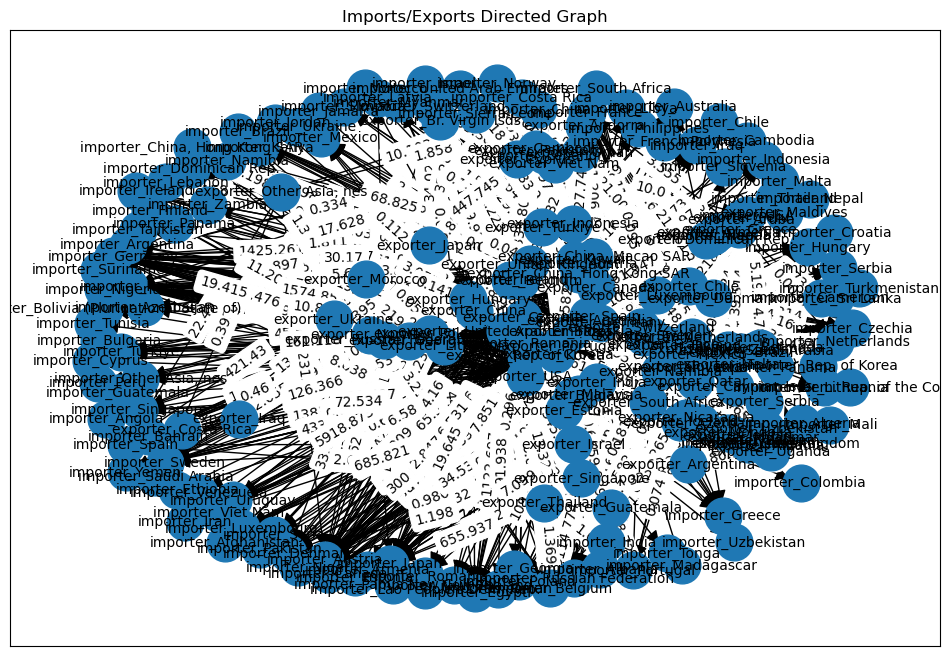

In [206]:
# Draw the graph (this may not work well for very large graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(B)  # positions for all nodes
nx.draw_networkx_nodes(B, pos, node_size=700)
nx.draw_networkx_edges(B, pos, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(B, pos, font_size=10)
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

plt.title("Imports/Exports Directed Graph")
plt.show()

In [164]:
# Create a dictionary to hold DataFrames for each unique `i`
datasets_by_exporter = {exporter: data for exporter, data in filtered_data.groupby(level='i')}


# Optionally, you can save each DataFrame to a CSV file if needed
for exporter, df in datasets_by_exporter.items():
    output_file = f"export_csv/dataset_for_exporter_{exporter}.csv"  # Modify the filename as needed
    df.to_csv(output_file)  # Save to CSV
    print(f"Saved dataset for exporter {exporter} to {output_file}")
    


Saved dataset for exporter Afghanistan to export_csv/dataset_for_exporter_Afghanistan.csv
Saved dataset for exporter Albania to export_csv/dataset_for_exporter_Albania.csv
Saved dataset for exporter Algeria to export_csv/dataset_for_exporter_Algeria.csv
Saved dataset for exporter Angola to export_csv/dataset_for_exporter_Angola.csv
Saved dataset for exporter Argentina to export_csv/dataset_for_exporter_Argentina.csv
Saved dataset for exporter Armenia to export_csv/dataset_for_exporter_Armenia.csv
Saved dataset for exporter Australia to export_csv/dataset_for_exporter_Australia.csv
Saved dataset for exporter Austria to export_csv/dataset_for_exporter_Austria.csv
Saved dataset for exporter Azerbaijan to export_csv/dataset_for_exporter_Azerbaijan.csv
Saved dataset for exporter Bahrain to export_csv/dataset_for_exporter_Bahrain.csv
Saved dataset for exporter Belgium to export_csv/dataset_for_exporter_Belgium.csv
Saved dataset for exporter Bolivia (Plurinational State of) to export_csv/data

In [42]:
def counting_degrees_diGraph(graph):
    '''
    A function that counts the total number of in and out degrees for each key value. Returns two lists of tuples.
    
        Input:
    graph = Your nx.diGraph
    
        Output:
    out_degree_list = A list of tuples, with the first value corresponding to the degree and the second value to nodes with
    said degree in the network. e.g (0, 25) -> 25 nodes have an outdegree 0
    in_degree_list = Same as above.
    '''
    out_degree = list(graph.out_degree)
    out_degree.sort()
    in_degree = list(graph.in_degree)
    in_degree.sort()

    
    out_degree_totals = []
    out_degree_counts = {}
    out_degree_list = []
    for i in out_degree:
        out_degree_totals.append(i[1])
    for i in out_degree_totals:
        out_degree_counts[i] = out_degree_totals.count(i)
    for key in out_degree_counts:
        out_degree_list.append((key, out_degree_counts[key]))
        
        
    # ADDED CODE TO ADD 0 FREQUENCY COUNTS, UP TO HIGHEST VALUE
    out_degree_list.sort()

    min_out_degree = out_degree_list[0][0]  # Get the minimum degree value
    max_out_degree = out_degree_list[-1][0]  # Get the maximum degree value

    # Loop over the range from min to max, adding missing values with count 0
    for degree in range(min_out_degree, max_out_degree + 1):
        if degree not in out_degree_counts:
            out_degree_list.append((degree, 0))
        
        
        
    in_degree_totals = []
    in_degree_counts = {}
    in_degree_list = []
    for i in in_degree:
        in_degree_totals.append(i[1])
    for i in in_degree_totals:
        in_degree_counts[i] = in_degree_totals.count(i)
    for key in in_degree_counts:
        in_degree_list.append((key, in_degree_counts[key]))
        
        
        
    # ADDED CODE TO ADD 0 FREQUENCY COUNTS, UP TO HIGHEST VALUE
    out_degree_list.sort()

    min_in_degree = in_degree_list[0][0]  # Get the minimum degree value
    max_in_degree = in_degree_list[-1][0]  # Get the maximum degree value

    # Loop over the range from min to max, adding missing values with count 0
    for degree in range(min_in_degree, max_in_degree + 1):
        if degree not in in_degree_counts:
            in_degree_list.append((degree, 0))
    
             
    out_degree_list.sort()
    in_degree_list.sort()
        
    return out_degree_list, in_degree_list


def cumulative_degree_plot(degree_list):
    '''
    To be expanded - A simple plot function for creating a cumulative degree plot
    
        Input:
    A degree list of tuples, as created by counting_degree_diGraph()
    
        Output:
    A plt.plot created from the two values in the tuples.
    '''
    degree_index_list = []
    degree_value_list = []
    degree_cumul_list = []
    
    for i in degree_list:
        degree_index_list.append(i[0])
        degree_value_list.append(i[1])
        
    for i in range(len(degree_index_list)):
        degree_cumul_list.append(np.sum(degree_value_list[i:]))
    
    
    list1 = []
    list2 = []
    
    for i in range(len(degree_list)):
        list1.append(degree_list[i][0])
        list2.append(degree_list[i][1])
       
    plt.xscale("log")
    plt.yscale("log")
        
    return plt.plot(degree_index_list, degree_cumul_list)


def closeness_centrality(graph):
    '''
    Small function for finding the node centrality of our network. Returns a sorted list of tuples and the highest value node.
    
    Input:
        graph = A networkx graph
        
    Output:
        node_centrality_tuples = A sorted list of tuples for each of the nodes, with their degree centrality.
        maxtup = A tuple for the highest value node.
    '''
    node_centrality = nx.degree_centrality(graph)
    node_centrality_tuples = sorted(node_centrality.items())
    maxtup = (0,0)


    for i in node_centrality_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
    
    return node_centrality_tuples, maxtup

def average_neighbor_degree(graph):
    '''
    Small function for finding the average degree of the neighbors to each node in the graph. Good for finding hubs.
    
    Input:
        graph = A networkx graph
        
    Output:
        avg_neighbor_degree_tuples = A sorted list of tuples for each of the nodes, with their average neighbor degree.
        maxdic = A dictionary of the highest value nodes.
        
        OPTIONAL maxtup = A tuple for the highest value node.
    '''
    
    average_neighbor_degree_dict = nx.average_neighbor_degree(graph)
    
    avg_neighbor_degree_tuples = sorted(average_neighbor_degree_dict.items())
    maxtup = (0,0)
    maxdic = {}
    
    for i in avg_neighbor_degree_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
            
    for i in avg_neighbor_degree_tuples:
        if i[1] == maxtup[1]:
            maxdic[i[0]] = i[1]
            
    return avg_neighbor_degree_tuples, maxdic #, maxtup

def betweenness_centrality(graph):
    '''
    Small function for finding the betweenness centrality - 
    Betweenness centrality is a measure used in network analysis to quantify the importance of a node within a graph 
    based on the number of shortest paths that pass through it. 
    It reflects how much a node acts as a bridge or mediator in the network.
    
    Input:
        graph = A networkx graph
    
    Output:
        betw_cen_tuples = A sorted list of tuples for each of the nodes, with their betweenness centrality.
        maxtup = A tuple for the highest value node.
    
    '''
    
    betw_cen = nx.betweenness_centrality(graph)
    
    betw_cen_tuples = sorted(betw_cen.items())
    maxtup = (0,0)
    
    for i in betw_cen_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
    
    return betw_cen_tuples, maxtup


def clustering_coefficient(graph):
    '''
    Small function for finding the clustering coefficient
    
    Input:
        graph = A networkx graph
        
    Output:
        clust_co_tuples = A sorted list of tuples for each of the nodes, with their clustering coefficient
        maxdic = A dictionary for the highest value nodes
        
        OPTIONAL maxtup = A tuple for the maximum value. Logically not sound, as many nodes will share clustering coefficients.
    '''
    
    clust_co = nx.clustering(graph)
    
    clust_co_tuples = sorted(clust_co.items())
    
    maxtup = (0,0)
    maxdic = {}
    
    for i in clust_co_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
            
    for i in clust_co_tuples:
        if i[1] == maxtup[1]:
            maxdic[i[0]] = i[1]
            
    return clust_co_tuples, maxdic #, maxtup

def maximum_shortest_path(graph):
    '''
    As we have a weakly connected graph, we can not directly find the diameter of our graph.
    Instead we must find the longest path within any two connected nodes in the network.
    
    Input:
        graph = A networkx graph
        
    Output:
        diameter = An integer that shows the longest path between two connected nodes.
        
    '''
    diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(graph)]) # maximum distance of a list containing the shortest paths between any two nodes in the graph (computed with Dijkstra's algorithm)
    
    # If you want to understand how the code works/runs, use the following:
    #for (i, j) in nx.shortest_path_length(graph):
    #    print(f'this is i: {i}')
    #    print(f'this is j: {j.values()}')
    
    # TO BE ADDED
    # Save the i-country to understand which nodes have the longest path.
    
    return diameter
